In [143]:
import numpy as np; import matplotlib.pyplot as plt
import random

In [251]:
def latt_init(n,f_b,f_r):
    # Input:  n: size of lattice(n*n); f_b:the fraction of blue sites; f_r:the fraction of red sites
    # Output: latt: initialised lattice
    #
    # initialize the lattice by assigning colors randomly, the fraction of blue sites is f_b,
    # the fraction of red sites is f_r and the rest sites is white, 
    # white is denoted by 0, blue is denoted by 1 and red is denoted by 2.
    n_blue = f_b*n**2
    n_red = f_r*n**2
    #white: 0 blue: 1 red:2
    latt = np.zeros([n,n])
    i=0
    while i<n_blue:
        x = random.randint(0,n-1); y = random.randint(0,n-1)
        if latt[x,y]!=1:
            latt[x,y]=1
            i = i+1
    i=0
    while i<n_red:
        x = random.randint(0,n-1); y = random.randint(0,n-1)
        if latt[x,y]!=1 and latt[x,y]!=2:
            latt[x,y]=2
            i = i+1
    return latt



def cal_f(latt,x,y, include_w = 0, diff = 0):
    # Input:  latt: any n*n lattice; x,y:sites coordinate; 
    #         include_w: whether include white house in total number of neighboring sites
    #         diff: whether to calculate the neighboring fraction with the different color           
    #
    # Output: f:the neighourhood fraction f; w_hou: the number of white house;
    #         w_pos:a random site of white house around the site
    # calculate the neighourhood fraction f, 
    # get the number of white house and a random site of white house around the site, 
    n = latt.shape[0]
    c = latt[x,y]
    w_hou = 0
    total = 8
    neigh = 0
    w_pos = []
    for i in [(x-1)%n,x,(x+1)%n]:
        for j in [(y-1)%n,y,(y+1)%n]:
            if i!=x or j!=y:           
                if diff==0 and latt[i,j] == c:
                    neigh += 1
                if diff==1 and latt[i,j] != c and latt[i,j]!=0:
                    neigh += 1    
                if include_w == 0:
                    if latt[i,j] == 0:
                        total -= 1
                        w_hou += 1
                        w_pos.append([i,j])
                        
    if w_hou!=0:                    
        x = random.randint(0,w_hou-1)              
        w_pos = w_pos[x]
    if w_hou==0:                                 
        w_pos = [0,0] 
    if total!=0:    
        f = neigh/total
    else:
        f = -1
    return f, w_hou, w_pos



def check_latt(latt, s):
    # check whether the lattice satistied the condition that all sites has neighborhood fraction is bigger than s. 
    # 1 satisfied 0 unsatisfied
    check = 1
    for i in range(n):
        for j in range(n):
            if latt[i,j]!=0:
                f = cal_f(latt,i,j, include_w = 0)[0]
                if f<s:
                    check = 0
                    break
    return check



def move(latt,x,y,w_posx,w_posy):
    # exchange the colored house with the white house
    c = latt[w_posx, w_posy]
    latt[w_posx, w_posy] = latt[x,y]
    latt[x,y]= c
    return latt



def f_sites_with_diff_c(latt):
    # calculate the fraction of colored sites that have at least one neighbour of a different color
    total = 0
    s = 0
    for i in range(n):
        for j in range(n):
            if latt[i,j]!=0:
                total += 1
                f = cal_f(latt,i,j)[0]
                if f<1 and f!=-1:
                    s += 1
    frac = s/total
    return frac    
    
    
    
def aver_f_diff(latt):
    # calculat the average fraction of different neighbouring houses(including white house)
    f_diff = []
    for i in range(n):
        for j in range(n):
            if latt[i,j]!=0:
                f_diff.append(cal_f(latt,i,j, include_w = 1, diff = 1)[0])
    frac = np.average(f_diff)
    return frac    

In [242]:
#number of 
n = 20
# similarity
s = 0.75
f_b = 0.3
f_r  = 0.3

In [243]:
latt = latt_init(n,f_b,f_r)
latt_t = [latt]

max_t = 10000000
check_t = 10000
i = 0
while i<max_t:
    # choose a random site
    x = random.randint(0,n-1); y = random.randint(0,n-1)
    [f,w_hou,[w_posx,w_posy]] = cal_f(latt,x,y)
    if f<s and w_hou!=0:
        latt = move(latt,x,y,w_posx,w_posy)
        latt_t.append(latt)
    i +=1
    if i%check_t==0:
        check = check_latt(latt,s)
        if check ==1:
            break
print(check)

1


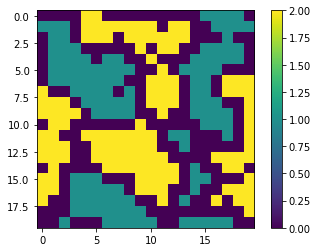

In [244]:
plt.imshow(latt)
plt.colorbar()
plt.savefig('%.2f.pdf'%s)

In [245]:
print(f_sites_with_diff_c(latt),aver_f_diff(latt))

0.09166666666666666 0.011458333333333333


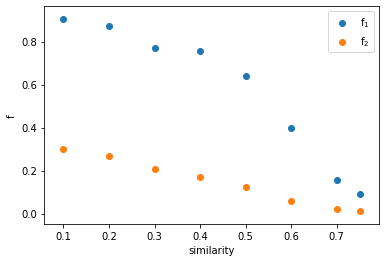

In [250]:
s  = [0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.75]
f1 = [0.904, 0.871, 0.771, 0.754, 0.642, 0.396, 0.158, 0.092] #f_sites_with_diff_c
f2 = [0.302, 0.266, 0.208, 0.171, 0.125, 0.059, 0.020, 0.011] #aver_f_diff

plt.figure(1)
plt.scatter(s, f1,label = 'f$_1$')
plt.scatter(s, f2,label = 'f$_2$')
plt.xlabel('similarity');plt.ylabel('f');plt.legend()
plt.savefig('f_s.pdf')